In [1]:
#!pip install simpletransformers==0.60.9
#!pip install simpletransformers

     |████████████████████████████████| 249 kB 4.8 MB/s 
     |████████████████████████████████| 6.6 MB 27.7 MB/s 
     |████████████████████████████████| 4.0 MB 32.6 MB/s 
     |████████████████████████████████| 1.8 MB 34.3 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 10.1 MB 16.4 MB/s 
     |████████████████████████████████| 1.2 MB 31.7 MB/s 
     |████████████████████████████████| 325 kB 32.2 MB/s 
     |████████████████████████████████| 77 kB 3.8 MB/s 
     |████████████████████████████████| 596 kB 31.6 MB/s 
     |████████████████████████████████| 880 kB 21.5 MB/s 
     |████████████████████████████████| 144 kB 39.2 MB/s 
     |████████████████████████████████| 181 kB 30.4 MB/s 
     |████████████████████████████████| 63 kB 821 kB/s 
     |████████████████████████████████| 212 kB 18.2 MB/s 
     |████████████████████████████████| 1.1 MB 36.0 MB/s 
     |████████████████████████████████| 136 kB 36.8 MB/s 
     |██████████████

In [3]:
import pandas as pd
import sklearn
from sklearn.metrics import f1_score
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import matplotlib.pyplot as plt 
import seaborn as sn

In [3]:
# For Neural models in Colab:

from google.colab import drive
drive.mount('/content/drive')

!ls drive

Mounted at /content/drive
MyDrive  Shareddrives


In [4]:
data_path = 'drive/MyDrive/olid-training-v1.0.tsv'

In [5]:
train = pd.read_csv(data_path, delimiter='\t', encoding='utf-8')
train.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [6]:
train.rename({'tweet': 'text', 'subtask_a': 'label'}, axis=1, inplace=True) # rename columns if necessary
train['target'] = train.label.map({'NOT':0, 'OFF':1}) # convert label to a numerical variable
train.drop(['subtask_b', 'subtask_c'], axis=1, inplace=True) # drop irrelevant columns
train.head()

#create a copy of the original data to work with 
df = train.copy()
df.head()

,id,text,label,target
0,86426,@USER She should ask a few native Americans wh...,OFF,1
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,1
2,16820,Amazon is investigating Chinese employees who ...,NOT,0
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,1
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,0


In [7]:
#import re
#import nltk
#from nltk.corpus import stopwords
#
#nltk.download('stopwords')
#eng_stops = set(stopwords.words('english'))
#
#nltk.download('wordnet')
#from nltk.stem import WordNetLemmatizer 
#lemmatizer = WordNetLemmatizer() 
#
#def clean(text):
#    # remove all the special characters
#    text = re.sub('[^a-zA-Z]', ' ',text) 
#    # convert all letters to lower case
#    words = text.lower().split()
#    # remove stop words
#    words = [w for w in words if not w in eng_stops]    
#    # lemmatizer
#    words = [lemmatizer.lemmatize(word) for word in words]
#    # join all words back to text
#    return (' '.join(words))
#
#df['clean'] = df['text'].apply(lambda x: clean(x))
#df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,id,text,label,target,clean
0,86426,@USER She should ask a few native Americans wh...,OFF,1,user ask native american take
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,1,user user go home drunk user maga trump url
2,16820,Amazon is investigating Chinese employees who ...,NOT,0,amazon investigating chinese employee selling ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,1,user someone vetaken piece shit volcano
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,0,user user obama wanted liberal amp illegals mo...


# We only use the 'text' column with *unprocessed, raw text data* as input:

In [8]:
train = pd.DataFrame({'text': df.text, 'labels': df.target})

In [9]:
train.head()

,text,labels
0,@USER She should ask a few native Americans wh...,1
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,1
2,Amazon is investigating Chinese employees who ...,0
3,"@USER Someone should'veTaken"" this piece of sh...",1
4,@USER @USER Obama wanted liberals &amp; illega...,0


In [10]:
from sklearn.model_selection import train_test_split

train, dev = train_test_split(train, test_size=0.1, random_state=42, 
                               stratify=train[['labels']])

In [11]:
print(len(train))
print("train:", train[['labels']].value_counts(sort=False))
train.head(3)

11916
train: labels
0         7956
1         3960
dtype: int64


,text,labels
12900,@USER I think I would pick that just for the f...,0
10804,@USER Or bite it off. Transition complete,0
11237,@USER For the hol tl to see😭. That’s tht Big D...,1


In [12]:
print(len(dev))
print("dev:", dev[['labels']].value_counts(sort=False))
dev.head(3)

1324
dev: labels
0         884
1         440
dtype: int64


,text,labels
352,@USER @USER She’s said before that she will al...,0
3729,@USER @USER @USER @USER @USER @USER @USER @USE...,0
12763,@USER @USER Just another Dem tactic. Leftist d...,0


In [13]:
model_args = ClassificationArgs()

model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
model_args.evaluate_during_training=True # to perform evaluation while training the model (eval data should be passed to the training method)

# Initial args
model_args.num_train_epochs=6
model_args.train_batch_size=64
model_args.learning_rate=1e-5 
model_args.max_seq_length=128 

# Early stopping to combat overfitting
model_args.use_early_stopping=True
model_args.early_stopping_delta=0.01
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True
model_args.early_stopping_patience=2
model_args.evaluate_during_training_steps=32

model_args.evaluate_during_training_silent=False
model_args.evaluate_each_epoch=False


## Other parameters for hyper-parameter optimization using manual tweaking over successive runs on validation set:

# model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
# model_args.evaluate_during_training=True # to perform evaluation while training the model (eval data should be passed to the training method)

# model_args.num_train_epochs=6
# model_args.train_batch_size=32
# model_args.learning_rate=4e-6  
# model_args.max_seq_length=128 

# # Early stopping to combat overfitting: https://simpletransformers.ai/docs/tips-and-tricks/#using-early-stopping
# model_args.use_early_stopping=True
# model_args.early_stopping_delta=0.01 # "The improvement over best_eval_loss necessary to count as a better checkpoint"
# model_args.early_stopping_metric='eval_loss'
# model_args.early_stopping_metric_minimize=True 
# model_args.early_stopping_patience=2 
# model_args.evaluate_during_training_steps=34 # how often you want to run validation in terms of training steps (or batches)

#model_args.evaluate_during_training_silent=False
#model_args.evaluate_each_epoch=False

In [14]:
model = ClassificationModel('bert', 'bert-base-cased', num_labels=2, args=model_args, use_cuda=True) 

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [15]:
_, history = model.train_model(train, eval_df=dev, f1=sklearn.metrics.f1_score) # F1-score for optimization on dev

  0%|          | 0/11916 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/187 [00:00<?, ?it/s]

  0%|          | 0/1324 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/166 [00:00<?, ?it/s]

  0%|          | 0/1324 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/166 [00:00<?, ?it/s]

  0%|          | 0/1324 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/166 [00:00<?, ?it/s]

  0%|          | 0/1324 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/166 [00:00<?, ?it/s]

  0%|          | 0/1324 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/166 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/187 [00:00<?, ?it/s]

  0%|          | 0/1324 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/166 [00:00<?, ?it/s]

  0%|          | 0/1324 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/166 [00:00<?, ?it/s]

  0%|          | 0/1324 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/166 [00:00<?, ?it/s]

  0%|          | 0/1324 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/166 [00:00<?, ?it/s]

  0%|          | 0/1324 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/166 [00:00<?, ?it/s]

  0%|          | 0/1324 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/166 [00:00<?, ?it/s]

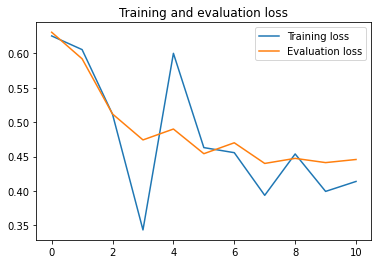

In [16]:
# Monitor loss on training/validation sets:
train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss')
plt.legend();

# Model converges quickly after 1-2 epochs, with validation loss saturating around 0.45; all in all not too bad

In [17]:
# Evaluate the model:
result, model_outputs, wrong_predictions = model.eval_model(dev)
result

  0%|          | 0/1324 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/166 [00:00<?, ?it/s]

{'auprc': 0.7331613122683053,
 'auroc': 0.8566137906211435,
 'eval_loss': 0.4457666557955455,
 'fn': 134,
 'fp': 134,
 'mcc': 0.5438708350473056,
 'tn': 750,
 'tp': 306}

### Compare with results of BERT *without preprocessing* on the validation set:
    {'auprc': 0.7318706658552511,
     'auroc': 0.8473429144385027,
     'eval_loss': 0.45799355334546193,
     'fn': 144,
     'fp': 138,
     'mcc': 0.5184211418270074,
     'tn': 746,
     'tp': 296}
### (Re)construct Confusion Matrices from false/true negatives/positives based on evaluation on the dev set:

In [6]:
import seaborn as sns

def plotCM(cm, title):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    
    labels = np.asarray(labels).reshape(2,2)
    
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    
    ax.set_title(title);
    ax.set_xlabel('\nPredicted Label')
    ax.set_ylabel('True Label');
    
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['NOT','OFF'])
    ax.yaxis.set_ticklabels(['NOT','OFF'])

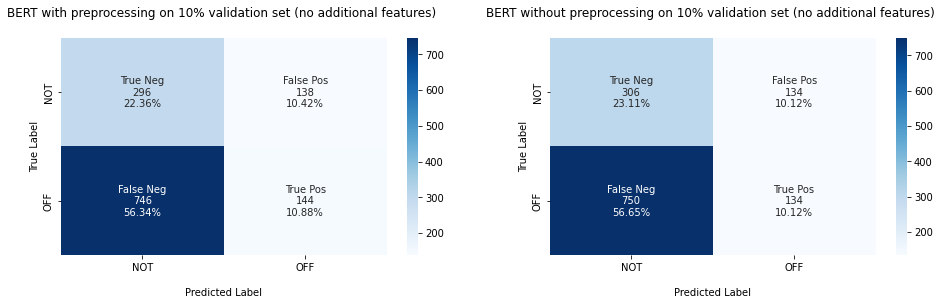

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn

cm_with = np.array([[296, 138], [746, 144]])
cm_without = np.array([[306, 134], [750, 134]])

plt.subplot(1, 2, 1)
plotCM(cm_with, 'BERT with preprocessing on 10% validation set (no additional features) \n')

plt.subplot(1, 2, 2)
plotCM(cm_without, 'BERT without preprocessing on 10% validation set (no additional features) \n')

plt.subplots_adjust(right=2.2)

plt.savefig('BERTs_on_validation.png', bbox_inches="tight")

plt.show();

In [18]:
predicted, probabilities = model.predict(dev.text.to_list())
dev['predicted'] = predicted

  0%|          | 0/1324 [00:00<?, ?it/s]

  0%|          | 0/166 [00:00<?, ?it/s]

In [24]:
F1 = f1_score(dev.labels, dev.predicted, average='macro')
F1

0.7719354175236528

In [1]:
# Macro F1-score difference between BERT without preprocessing (see above) and SVM model (see traditional notebook)
0.772 - 0.736

0.03600000000000003

In [25]:
dev.head()

,text,labels,predicted
352,@USER @USER She’s said before that she will al...,0,0
3729,@USER @USER @USER @USER @USER @USER @USER @USE...,0,0
12763,@USER @USER Just another Dem tactic. Leftist d...,0,0
9397,@USER @USER @USER Funny how well meaning left ...,0,1
11968,@USER @USER Well it seems like there was some ...,0,0


**Comparing BERT without preprocessing in this notebook to the same BERT with preprocessing (see the `Neural_with_preprocessing_no_features` notebook in this folder), we observe a significant decrease in false negatives and false positives, and a corresponding increase in true negatives/positives in the former system. We also observe a slight decrease of `auprc`, `auroc`, and `eval_loss`, and a corresponding slight increase in `mcc`. We conclude that `Neural_no_preprocessing_no_features_Submissions` contains the better model. Our main reason for doing so is the significant increase in performance on the validation set in terms of macro F1-score by 3.4%. Whereas the current BERT achieved a macro F1 of 0.77 on the validation set, the BERT model with all preprocessing methods applied only achieved a macro F1 of 0.74, which is on par with the best performing traditional linear SVM model. For these reasons, we selected this model for generating the final predictions to submit to the shared task competition (see below), in which our neural system ranked 3rd.**

## Generating prediction files for submission to the shared task:

In [41]:
data_path1 = '/content/drive/MyDrive/data test/test_IN.csv'

In [42]:
test_IN = pd.read_csv(data_path1, delimiter=',', encoding='utf-8')
test_IN.head()

,id,tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,27014,"#ConstitutionDay is revered by Conservatives, ..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
3,13876,#Watching #Boomer getting the news that she is...
4,60133,#NoPasaran: Unity demo to oppose the far-right...


In [43]:
test_IN.shape

(860, 2)

In [44]:
predicted, probabilities = model.predict(test_IN.tweet.to_list())
test_IN['label'] = predicted

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

In [49]:
test_IN.head()

,id,tweet,label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,1
1,27014,"#ConstitutionDay is revered by Conservatives, ...",0
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,0
3,13876,#Watching #Boomer getting the news that she is...,0
4,60133,#NoPasaran: Unity demo to oppose the far-right...,0


In [46]:
test_IN_neural = test_IN[['id', 'label']]
test_IN_neural['label'] = test_IN_neural.label.map({0:'NOT', 1:'OFF'})
test_IN_neural.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,label
0,15923,OFF
1,27014,NOT
2,30530,NOT
3,13876,NOT
4,60133,NOT


In [50]:
test_IN_neural.shape

(860, 2)

In [51]:
test_IN_neural.label.value_counts()

NOT    649
OFF    211
Name: label, dtype: int64

In [52]:
#test_IN_neural.to_csv('./drive/My Drive/test_IN_neural.csv', index=False)

In [53]:
data_path2 = '/content/drive/MyDrive/data test/test_OUT1.csv'

In [54]:
test_OUT1 = pd.read_csv(data_path2, delimiter=',', encoding='utf-8')
test_OUT1.head()

,id,tweet
0,37,Maybe it could have something to do with the r...
1,127,"Weirdly enough, i think about this fairly freq..."
2,143,Your idea (while posing a real problem with et...
3,146,>it will encourage a part of the people you ba...
4,186,If something like this could make someone supp...


In [55]:
predicted, probabilities = model.predict(test_OUT1.tweet.to_list())
test_OUT1['label'] = predicted

  0%|          | 0/1207 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

In [56]:
test_OUT1.head()

,id,tweet,label
0,37,Maybe it could have something to do with the r...,0
1,127,"Weirdly enough, i think about this fairly freq...",1
2,143,Your idea (while posing a real problem with et...,0
3,146,>it will encourage a part of the people you ba...,0
4,186,If something like this could make someone supp...,1


In [57]:
test_OUT1_neural = test_OUT1[['id', 'label']]
test_OUT1_neural['label'] = test_OUT1_neural.label.map({0:'NOT', 1:'OFF'})
test_OUT1_neural.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,label
0,37,NOT
1,127,OFF
2,143,NOT
3,146,NOT
4,186,OFF


In [58]:
print(test_OUT1_neural.shape)
print(test_OUT1_neural.label.value_counts())

(1207, 2)
NOT    864
OFF    343
Name: label, dtype: int64


In [59]:
#test_OUT1_neural.to_csv('./drive/My Drive/test_OUT1_neural.csv', index=False)

In [60]:
data_path3 = '/content/drive/MyDrive/data test/test_OUT2.csv'

In [61]:
test_OUT2 = pd.read_csv(data_path3, delimiter=',', encoding='utf-8')
test_OUT2.head()

,id,tweet
0,0072b9c3697ab8cc,== Argh == \r\n\r\n Some random idiot deleted ...
1,0081b14d79f54b31,(we hate america and we are going to bomb the ...
2,008eb47c4684d190,""" \r\n\r\n So, on the tenth anniversary of 9/1..."
3,010c2a979fab2e3f,casualt i fucked your mum and i liked it !!ies
4,01680b05bde74236,"""Welcome! \r\n\r\n Hello, , and welcome to Wik..."


In [62]:
predicted, probabilities = model.predict(test_OUT2.tweet.to_list())
test_OUT2['label'] = predicted

  0%|          | 0/1200 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
test_OUT2.head()

In [63]:
test_OUT2_neural = test_OUT2[['id', 'label']]
test_OUT2_neural['label'] = test_OUT2_neural.label.map({0:'NOT', 1:'OFF'})
test_OUT2_neural.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,label
0,0072b9c3697ab8cc,OFF
1,0081b14d79f54b31,OFF
2,008eb47c4684d190,OFF
3,010c2a979fab2e3f,OFF
4,01680b05bde74236,NOT


In [64]:
print(test_OUT2_neural.shape)
print(test_OUT2_neural.label.value_counts())

(1200, 2)
NOT    615
OFF    585
Name: label, dtype: int64


In [65]:
#test_OUT2_neural.to_csv('./drive/My Drive/test_OUT2_neural.csv', index=False)

In [66]:
data_path4 = '/content/drive/MyDrive/data test/test_TEXTGAIN.csv'

In [67]:
test_TEXTGAIN = pd.read_csv(data_path4, delimiter=',', encoding='utf-8')
test_TEXTGAIN.head()

,id,tweet
0,0,"a few American personality camels, well adjust..."
1,1,@juniormufasa_ how come lukaku flop @ man uu ...
2,2,LUKAKU IS SUCH A NIGGER I HATE THIS APE
3,3,I beg you lot keep that porch monkey coon Shau...
4,4,TRY NOT TO GET HIGH AS THE MONKEY !!! ❌\r\n\r\...


In [68]:
test_TEXTGAIN.shape

(1276, 2)

In [69]:
predicted, probabilities = model.predict(test_TEXTGAIN.tweet.to_list())
test_TEXTGAIN['label'] = predicted

  0%|          | 0/1276 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

In [70]:
test_TEXTGAIN_neural = test_TEXTGAIN[['id', 'label']]
test_TEXTGAIN_neural['label'] = test_TEXTGAIN_neural.label.map({0:'NOT', 1:'OFF'})
test_TEXTGAIN_neural.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,label
0,0,NOT
1,1,OFF
2,2,NOT
3,3,OFF
4,4,NOT


In [71]:
print(test_TEXTGAIN_neural.shape)
print(test_TEXTGAIN_neural.label.value_counts())

(1276, 2)
NOT    748
OFF    528
Name: label, dtype: int64


In [72]:
#test_TEXTGAIN_neural.to_csv('./drive/My Drive/test_TEXTGAIN_neural.csv', index=False)

# Loading libraries for generating results

In [5]:
# general packages for data manipulation
import sklearn 
import numpy as np
import pandas as pd

# visualizations
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# consistent size plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12

# handle warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# display pandas dataframe columns 
pd.options.display.max_columns = None


# Load the sklearn stuff
import sklearn 
print(sklearn.__version__)

# making text data numeric
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# making numeric data comparable
from sklearn.preprocessing import StandardScaler

# experimental regime and pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# machine learning algorithm
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# get reproducible results
np.random.seed(42)
#tf.random.set_seed(42)

1.0.2


## OLID

              precision    recall  f1-score   support

         NOT       0.88      0.92      0.90       620
         OFF       0.77      0.68      0.72       240

    accuracy                           0.85       860
   macro avg       0.82      0.80      0.81       860
weighted avg       0.85      0.85      0.85       860



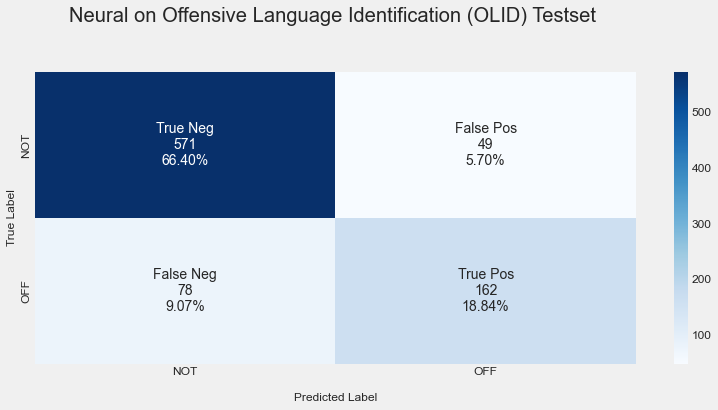

In [7]:
test_SET_gold = pd.read_csv('labels/test_IN_gold.csv', delimiter=',', encoding='utf-8')
test_SET_neural = pd.read_csv('test_IN_neural.csv', delimiter=',', encoding='utf-8')

y_val = list(test_SET_gold.label)
y_val_pred = list(test_SET_neural.label)

print(classification_report(y_val, y_val_pred))

cm = confusion_matrix(y_val, y_val_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Neural on Offensive Language Identification (OLID) Testset \n\n');
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('True Label');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NOT','OFF'])
ax.yaxis.set_ticklabels(['NOT','OFF'])

plt.savefig('Uncleaned_BERT_on_test_OLID.png', bbox_inches="tight")

## Display the visualization of the Confusion Matrix.
plt.show();

## Ruddit

              precision    recall  f1-score   support

         NOT       0.67      0.87      0.76       664
         OFF       0.75      0.48      0.58       543

    accuracy                           0.69      1207
   macro avg       0.71      0.67      0.67      1207
weighted avg       0.71      0.69      0.68      1207



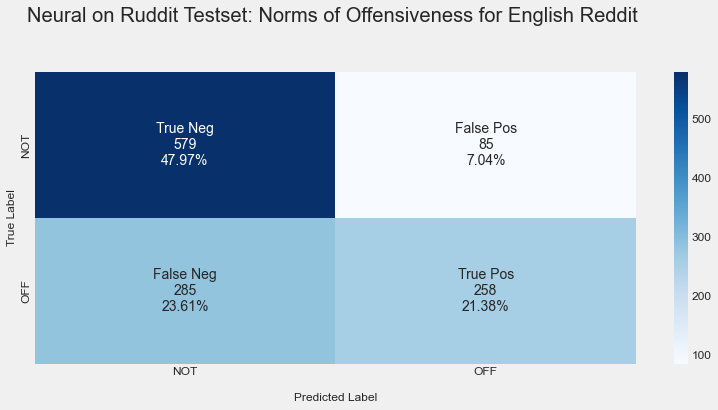

In [8]:
test_SET_gold = pd.read_csv('labels/test_OUT1_gold.csv', delimiter=',', encoding='utf-8')
test_SET_neural = pd.read_csv('test_OUT1_neural.csv', delimiter=',', encoding='utf-8')

y_val = list(test_SET_gold.label)
y_val_pred = list(test_SET_neural.label)

print(classification_report(y_val, y_val_pred))

cm = confusion_matrix(y_val, y_val_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Neural on Ruddit Testset: Norms of Offensiveness for English Reddit \n\n');
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('True Label');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NOT','OFF'])
ax.yaxis.set_ticklabels(['NOT','OFF'])

plt.savefig('Uncleaned_BERT_on_test_Ruddit.png', bbox_inches="tight")

## Display the visualization of the Confusion Matrix.
plt.show();

## Wikipedia (Kaggle Jigsaw)

              precision    recall  f1-score   support

         NOT       0.87      0.90      0.88       600
         OFF       0.89      0.87      0.88       600

    accuracy                           0.88      1200
   macro avg       0.88      0.88      0.88      1200
weighted avg       0.88      0.88      0.88      1200



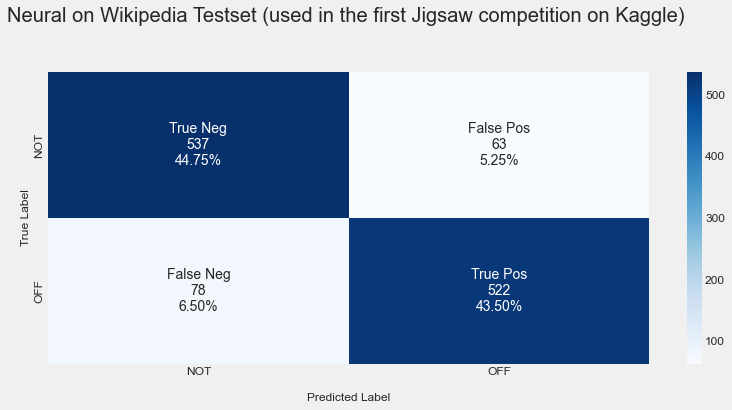

In [9]:
test_SET_gold = pd.read_csv('labels/test_OUT2_gold.csv', delimiter=',', encoding='utf-8')
test_SET_neural = pd.read_csv('test_OUT2_neural.csv', delimiter=',', encoding='utf-8')

y_val = list(test_SET_gold.label)
y_val_pred = list(test_SET_neural.label)

print(classification_report(y_val, y_val_pred))

cm = confusion_matrix(y_val, y_val_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Neural on Wikipedia Testset (used in the first Jigsaw competition on Kaggle) \n\n');
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('True Label');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NOT','OFF'])
ax.yaxis.set_ticklabels(['NOT','OFF'])

plt.savefig('Uncleaned_BERT_on_test_Wikipedia.png', bbox_inches="tight")

## Display the visualization of the Confusion Matrix.
plt.show();

## TextGain (English football tweets)

              precision    recall  f1-score   support

         NOT       0.89      0.61      0.72      1088
         OFF       0.19      0.54      0.28       188

    accuracy                           0.60      1276
   macro avg       0.54      0.58      0.50      1276
weighted avg       0.78      0.60      0.66      1276



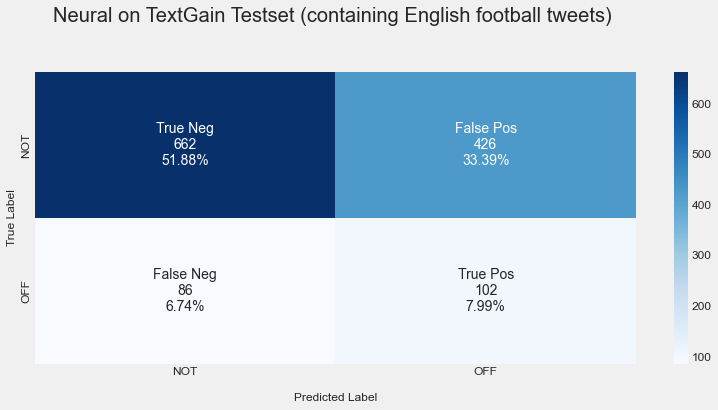

In [11]:
test_SET_gold = pd.read_csv('labels/test_TEXTGAIN_gold.csv', delimiter=',', encoding='utf-8')
test_SET_neural = pd.read_csv('test_TEXTGAIN_neural.csv', delimiter=',', encoding='utf-8')

y_val = list(test_SET_gold.label)
y_val_pred = list(test_SET_neural.label)

print(classification_report(y_val, y_val_pred))

cm = confusion_matrix(y_val, y_val_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Neural on TextGain Testset (containing English football tweets) \n\n');
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('True Label');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NOT','OFF'])
ax.yaxis.set_ticklabels(['NOT','OFF'])

plt.savefig('Uncleaned_BERT_on_test_TextGain.png', bbox_inches="tight")

## Display the visualization of the Confusion Matrix.
plt.show();